# Fetch a circle of rainfall data around a special point


### Requirements for it to work 

0. set up permissions using your Earthdata credentials, in home directory: 

    - echo "machine urs.earthdata.nasa.gov login LOGIN password PASSWORD" >> ~/.netrc

    - touch ~/.urs_cookies
    
    - add these to ~/.dodsrc as explained [here](https://disc.gsfc.nasa.gov/data-access)

Install xarray

In [1]:
import datetime
import xarray as xr

In [22]:
# URL to remotely access

# NASA THREDDS data server (TDS) URLs
#URL = 'https://goldsmr4.gesdisc.eosdis.nasa.gov/thredds/dodsC/MERRA2_MONTHLY_aggregation/M2TMNXAER.5.12.4_Aggregation.ncml' # aerosol
#URL = 'https://gpm1.gesdisc.eosdis.nasa.gov/thredds/dodsC/aggregation/GPM_3IMERGM.06/GPM_3IMERGM.06_Aggregation.ncml.ncml' # GPM monthly

# NASA GDS data server (GDS) URLs
# https://gpm1.gesdisc.eosdis.nasa.gov/dods/

URLd= 'https://gpm1.gesdisc.eosdis.nasa.gov/dods/GPM_3IMERGDF_06' # GPM daily accumulated final on GDS server
URLm= 'https://gpm1.gesdisc.eosdis.nasa.gov/dods/GPM_3IMERGM_06'  # monthly accumulated
URLh= 'https://gpm1.gesdisc.eosdis.nasa.gov/dods/GPM_3IMERGHH_06' # half-hourly instantaneous

# Read the data: daily as a test
ds = xr.open_dataset(URLd)
ds

/Users/brianmapes/opt/miniconda3/envs/tropycal/lib/python3.10/site-packages/xarray/coding/times.py:144: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:0.0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:0.0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


<xarray.Dataset>
Dimensions:    (time: 7792, lat: 1800, lon: 3600)
Coordinates:
  * time       (time) datetime64[ns] 2000-06-01 2000-06-02 ... 2021-09-30
  * lat        (lat) float64 -89.95 -89.85 -89.75 -89.65 ... 89.75 89.85 89.95
  * lon        (lon) float64 -179.9 -179.8 -179.8 -179.7 ... 179.8 179.8 179.9
Data variables:
    hqprecip   (time, lat, lon) float32 ...
    precipcal  (time, lat, lon) float32 ...
Attributes:
    title:        GPM Level 3 IMERG Final V06 Daily 0.1 x 0.1 degree Precipit...
    Conventions:  COARDS\nGrADS
    dataType:     Grid
    history:      Wed Mar 02 15:13:51 GMT 2022 : imported by GrADS Data Serve...

In [8]:
specialat = 20
specialon = -80
specialtime = datetime.datetime(2010,10,1)
radius = 5 # degrees, ignoring cos(lat) factor in dx=dlon*cos(lat)

# Subset dataset to bounding box: 
dsbox = ds.sel(lat=slice(specialat-radius,specialat+radius),
               lon=slice(specialon-radius,specialon+radius),
               time=specialtime); dsbox

<xarray.Dataset>
Dimensions:    (lat: 100, lon: 100)
Coordinates:
    time       datetime64[ns] 2010-10-01
  * lat        (lat) float64 15.05 15.15 15.25 15.35 ... 24.65 24.75 24.85 24.95
  * lon        (lon) float64 -84.95 -84.85 -84.75 ... -75.25 -75.15 -75.05
Data variables:
    hqprecip   (lat, lon) float32 ...
    precipcal  (lat, lon) float32 ...
Attributes:
    title:        GPM Level 3 IMERG Final V06 Daily 0.1 x 0.1 degree Precipit...
    Conventions:  COARDS\nGrADS
    dataType:     Grid
    history:      Wed Mar 02 15:13:51 GMT 2022 : imported by GrADS Data Serve...

In [9]:
lat2D = dsbox.lat * (dsbox.lon<999)
lon2D = dsbox.lon * (dsbox.lat<999)
dist2 = (lat2D-specialat)**2 + (lon2D-specialon)**2; dist2

<xarray.DataArray (lat: 100, lon: 100)>
array([[49.005, 48.025, 47.065, ..., 47.065, 48.025, 49.005],
       [48.025, 47.045, 46.085, ..., 46.085, 47.045, 48.025],
       [47.065, 46.085, 45.125, ..., 45.125, 46.085, 47.065],
       ...,
       [47.065, 46.085, 45.125, ..., 45.125, 46.085, 47.065],
       [48.025, 47.045, 46.085, ..., 46.085, 47.045, 48.025],
       [49.005, 48.025, 47.065, ..., 47.065, 48.025, 49.005]])
Coordinates:
    time     datetime64[ns] 2010-10-01
  * lat      (lat) float64 15.05 15.15 15.25 15.35 ... 24.65 24.75 24.85 24.95
  * lon      (lon) float64 -84.95 -84.85 -84.75 -84.65 ... -75.25 -75.15 -75.05

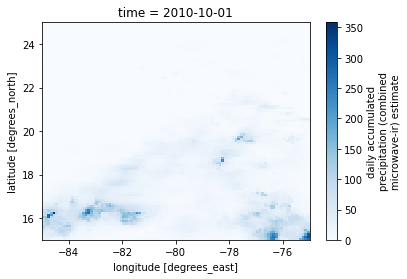

In [11]:
dsbox['precipcal'].plot(cmap='Blues')

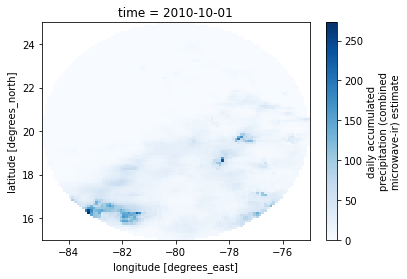

In [12]:
dsbox['precipcal'].where(dist2<radius**2).plot(cmap='Blues')

In [21]:
dsbox['precipcal'].where(dist2<radius**2).mean().values

array(11.429047, dtype=float32)